# Machine Intelligence for Finance
**Coursework – Academic Year 2025–2026**

This Jupyter Notebook accompanies the coursework submission for the *Machine Intelligence for Finance* module (Academic Year 2025–2026). It contains the Python implementations required to reproduce the figures, tables, and results presented in the corresponding PDF report.

The analyses focus on the statistical properties of stock price and return time series, including log-price transformations, sliding-window statistics, and return-based representations commonly used in financial modelling. All simulations are implemented in **Python 3** and the notebook is structured to mirror the organisation and numbering of the coursework handout.


## Section 1 - Regression Methods
### 1.1 Processing stock price data in Python

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Question 1.1.1

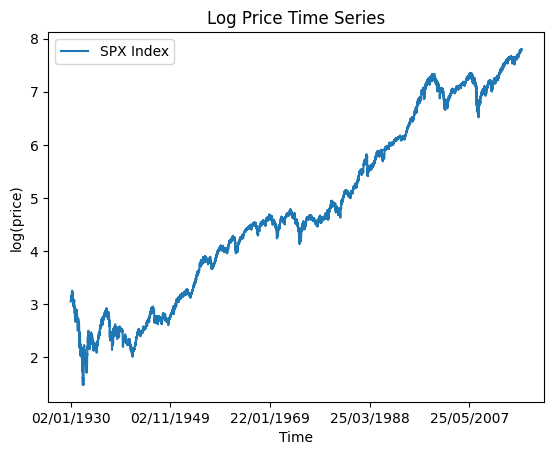

In [62]:
px = pd.read_csv("priceData.csv", index_col=0, parse_dates=True)

# Log Price
logpx = np.log(px)

# Plotting graph
ax = logpx.plot(title="Log Price Time Series")
ax.set_xlabel("Time")
ax.set_ylabel("log(price)")
plt.show()


#### Question 1.1.2


<Figure size 1400x500 with 0 Axes>

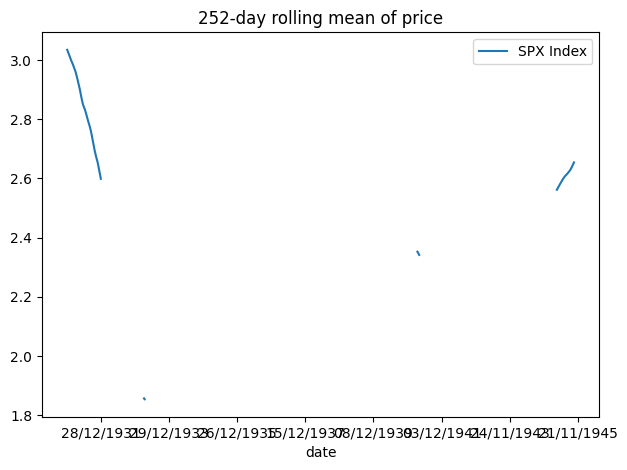

<Figure size 1400x500 with 0 Axes>

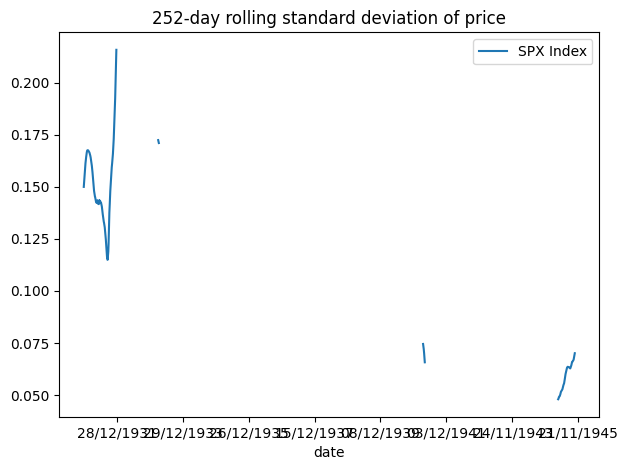

In [63]:
# Rolling mean
plt.figure(figsize=(14,5))
logpx.rolling(252).mean().plot()
plt.title("252-day rolling mean of price")
plt.tight_layout()
plt.show()

# Rolling std
plt.figure(figsize=(14,5))
logpx.rolling(252).std().plot()
plt.title("252-day rolling standard deviation of price")
plt.tight_layout()
plt.show()

Missing observations in the time series lead to undefined values in the sliding-window statistics. For visualisation purposes, these are handled via interpolation, which estimates missing values using neighbouring observations and enables continuous rolling-window calculations. This does not affect the conclusions regarding stationarity.

<Figure size 640x480 with 0 Axes>

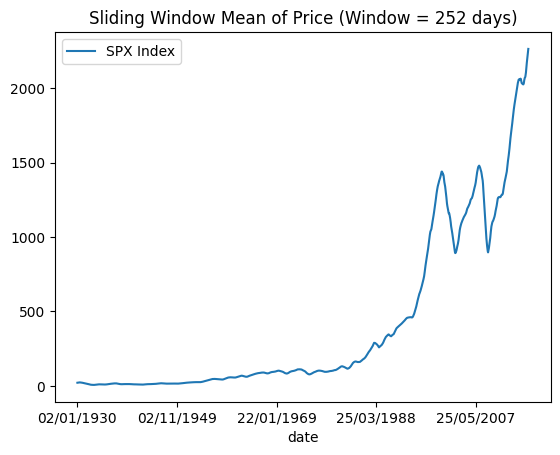

<Figure size 640x480 with 0 Axes>

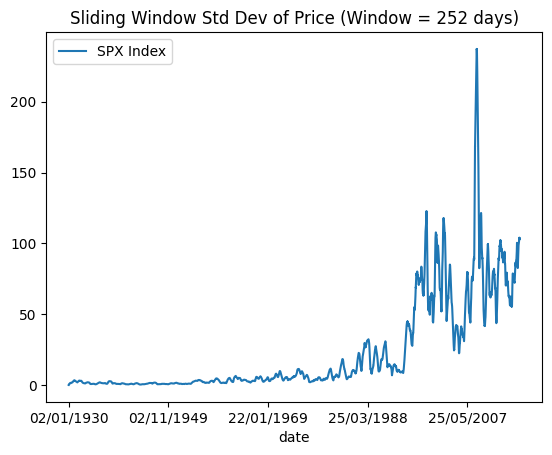

<Figure size 640x480 with 0 Axes>

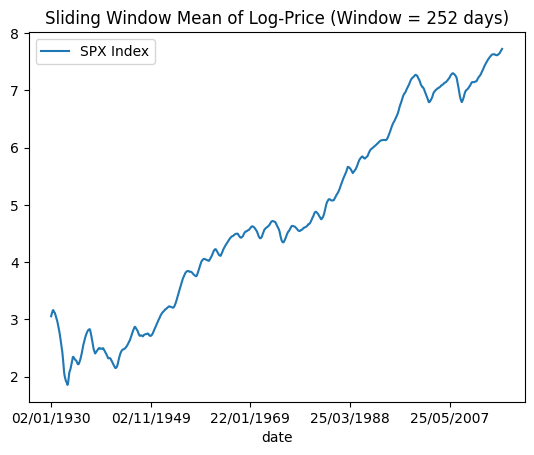

<Figure size 640x480 with 0 Axes>

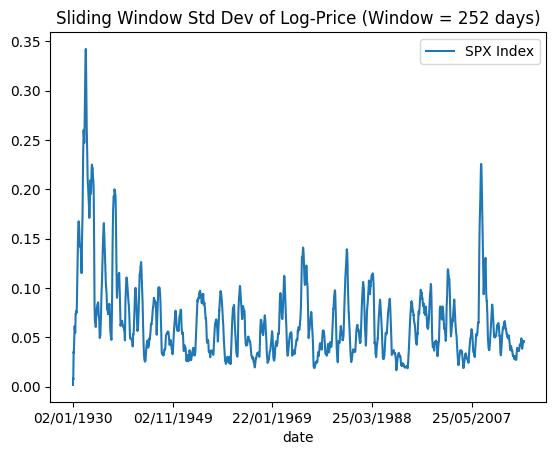

In [64]:

# Sliding mean for prices
plt.figure()
px.rolling(252, min_periods=1).mean().plot()
plt.title('Sliding Window Mean of Price (Window = 252 days)')
plt.show()

# Sliding standard deviation for prices
plt.figure()
px.rolling(252, min_periods=1).std().plot()
plt.title('Sliding Window Std Dev of Price (Window = 252 days)')
plt.show()

# Sliding mean for log-prices
plt.figure()
logpx.rolling(252, min_periods=1).mean().plot()
plt.title('Sliding Window Mean of Log-Price (Window = 252 days)')
plt.show()

# Sliding standard deviation for log-prices
plt.figure()
logpx.rolling(252, min_periods=1).std().plot()
plt.title('Sliding Window Std Dev of Log-Price (Window = 252 days)')
plt.show()



The rolling mean and standard deviation of both the price and log-price series vary over time, indicating non-constant first- and second-order statistics. This demonstrates that neither series is stationary. While the log transformation reduces the scale of fluctuations, it does not eliminate the underlying non-stationary behaviour.The sliding-window statistics reveal clear evidence of non-stationarity in both the price and log-price time series.

For the price series, the 252-day rolling mean exhibits a pronounced upward trend over time rather than fluctuating around a constant level, indicating a non-constant first-order moment. In addition, the rolling standard deviation varies substantially across the sample, with periods of elevated and reduced volatility, demonstrating time-varying second-order statistics.

A similar behaviour is observed for the log-price series. Although the logarithmic transformation compresses the scale of fluctuations, the rolling mean still displays a persistent upward trend, and the rolling standard deviation remains time-dependent.

Consequently, neither the price nor the log-price series can be considered stationary, as both the mean and variance change over time. The log transformation improves numerical stability but does not remove the underlying non-stationarity.

#### Question 1.1.3


/var/folders/tk/ykrs7y753dn8dmkvm_bk8yzw0000gn/T/ipykernel_12523/1159489027.py:5: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  simpret = px.pct_change()


<Figure size 1400x500 with 0 Axes>

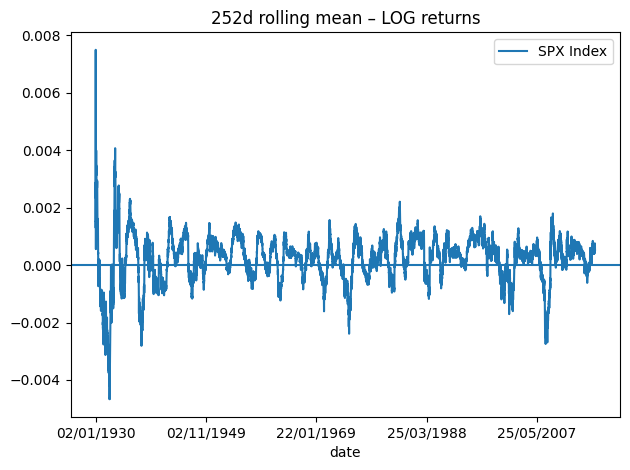

<Figure size 1400x500 with 0 Axes>

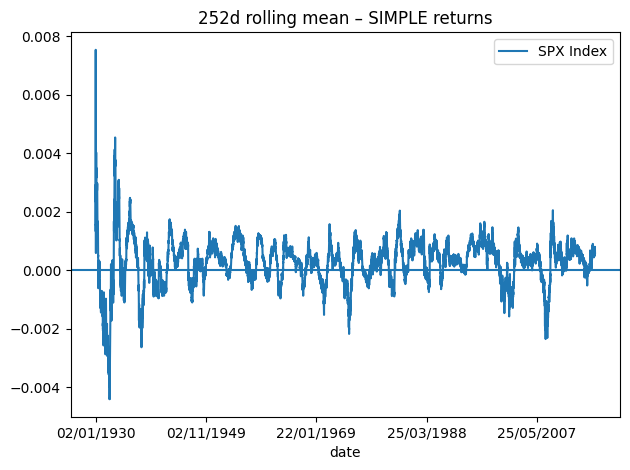

<Figure size 1400x500 with 0 Axes>

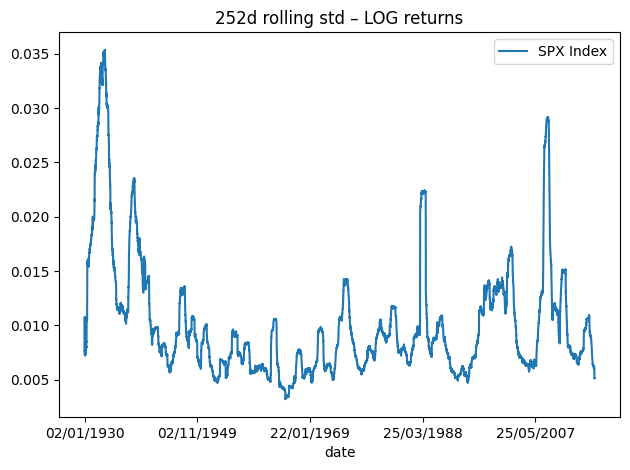

<Figure size 1400x500 with 0 Axes>

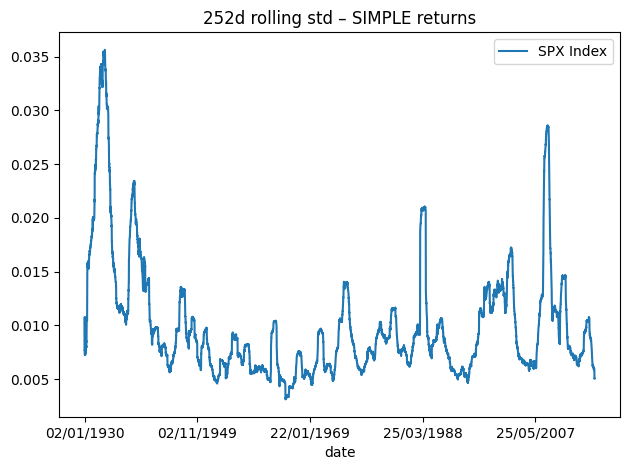

In [65]:
# log returns
logret = logpx.diff()

# simple returns
simpret = px.pct_change()

# Rolling mean
plt.figure(figsize=(14,5))
logret.rolling(252, min_periods=1).mean().plot(title="252d rolling mean – LOG returns")
plt.axhline(0)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14,5))
simpret.rolling(252, min_periods=1).mean().plot(title="252d rolling mean – SIMPLE returns")
plt.axhline(0)
plt.tight_layout()
plt.show()


# Rolling std
plt.figure(figsize=(14,5))
logret.rolling(252, min_periods=1).std().plot(title="252d rolling std – LOG returns")
plt.tight_layout()
plt.show()

plt.figure(figsize=(14,5))
simpret.rolling(252, min_periods=1).std().plot(title="252d rolling std – SIMPLE returns")
plt.tight_layout()
plt.show()


The rolling mean of both simple and logarithmic returns is approximately constant and close to zero, indicating stationarity in the first-order moment. However, the rolling variance still varies over time, reflecting volatility clustering. Consequently, while returns are closer to weak stationarity than prices, they are not strictly stationary.

#### Question 1.1.4

In [66]:
import pandas as pd
from scipy import stats

rows = []
alpha = 0.05  # significance level

# Log returns
for col in logret.columns:
    jb_stat, jb_p = stats.jarque_bera(logret[col].dropna())
    rows.append({
        "Series": col,
        "Type": "Log return",
        "JB statistic": jb_stat,
        "p-value": jb_p,
        "Reject normality": "Y" if jb_p < alpha else "N"
    })

# Simple returns
for col in simpret.columns:
    jb_stat, jb_p = stats.jarque_bera(simpret[col].dropna())
    rows.append({
        "Series": col,
        "Type": "Simple return",
        "JB statistic": jb_stat,
        "p-value": jb_p,
        "Reject normality": "Y" if jb_p < alpha else "N"
    })

jb_table = pd.DataFrame(rows)
jb_table


,Series,Type,JB statistic,p-value,Reject normality
0,SPX Index,Log return,311807.270490,0.0,Y
1,SPX Index,Simple return,284160.677303,0.0,Y


The Jarque–Bera test rejects the null hypothesis of normality for both simple and log returns, indicating that neither series follows a Gaussian distribution. Despite this, log returns are preferable for signal processing as they are additive over time and symmetric around zero. For small price changes, log returns are approximately Gaussian and arise naturally under the geometric Brownian motion assumption. The rejection of normality reflects limitations of the Gaussian modelling assumption rather than a failure of the log-return framework itself.

### 1.2 ARMA vs ARIMA Models For Financial Evaluation

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.ar_model import AutoReg
import copy

#### Question 1.2.1

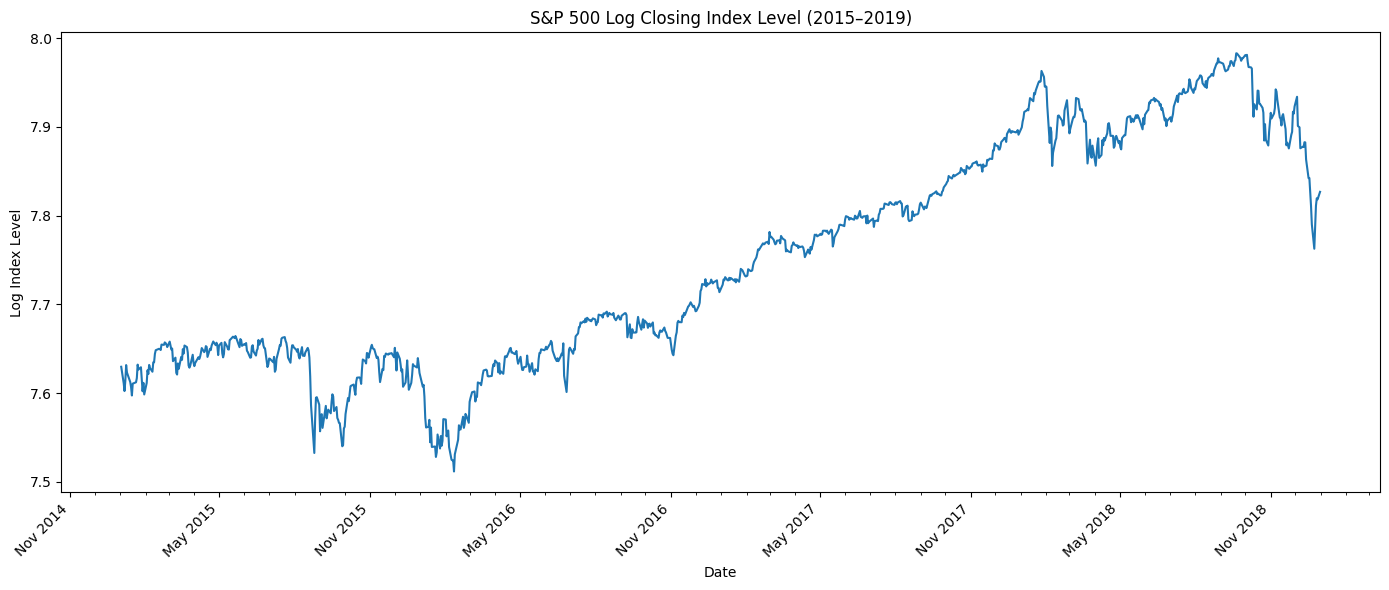

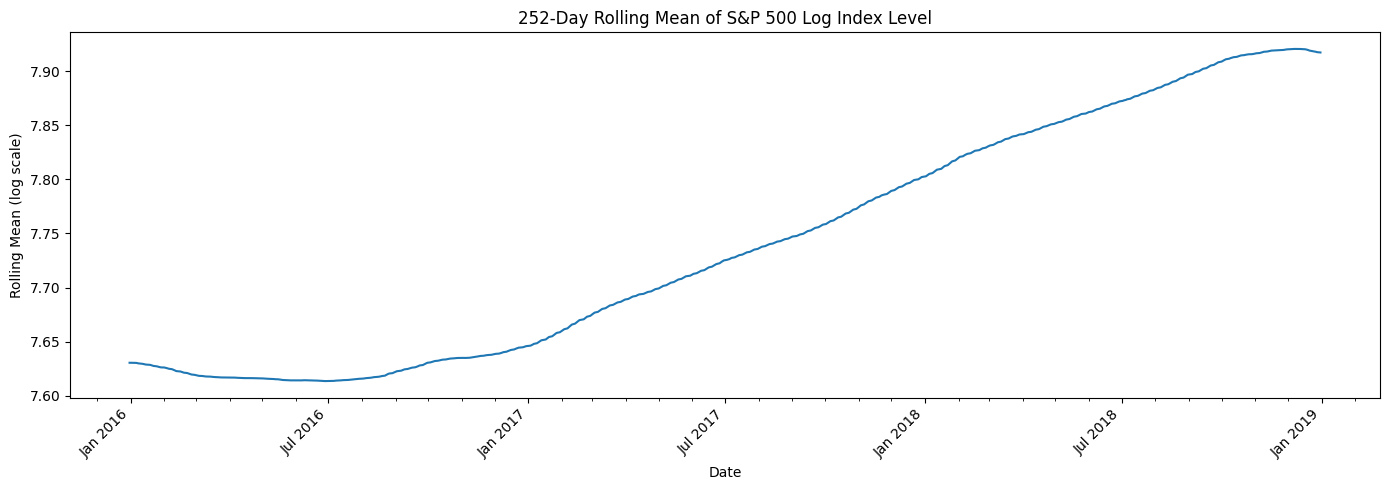

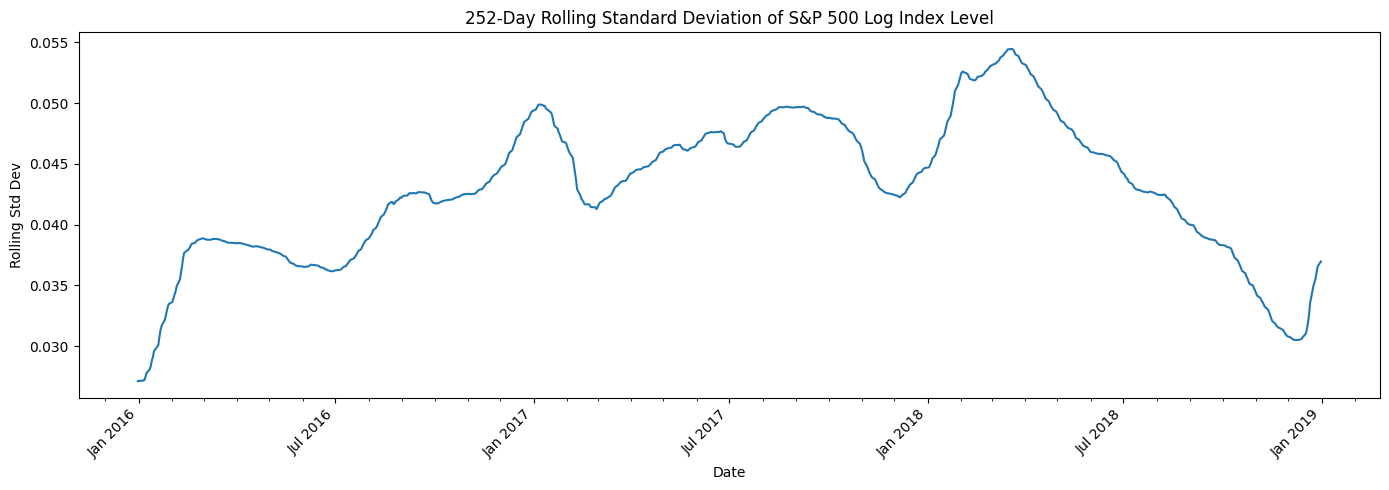

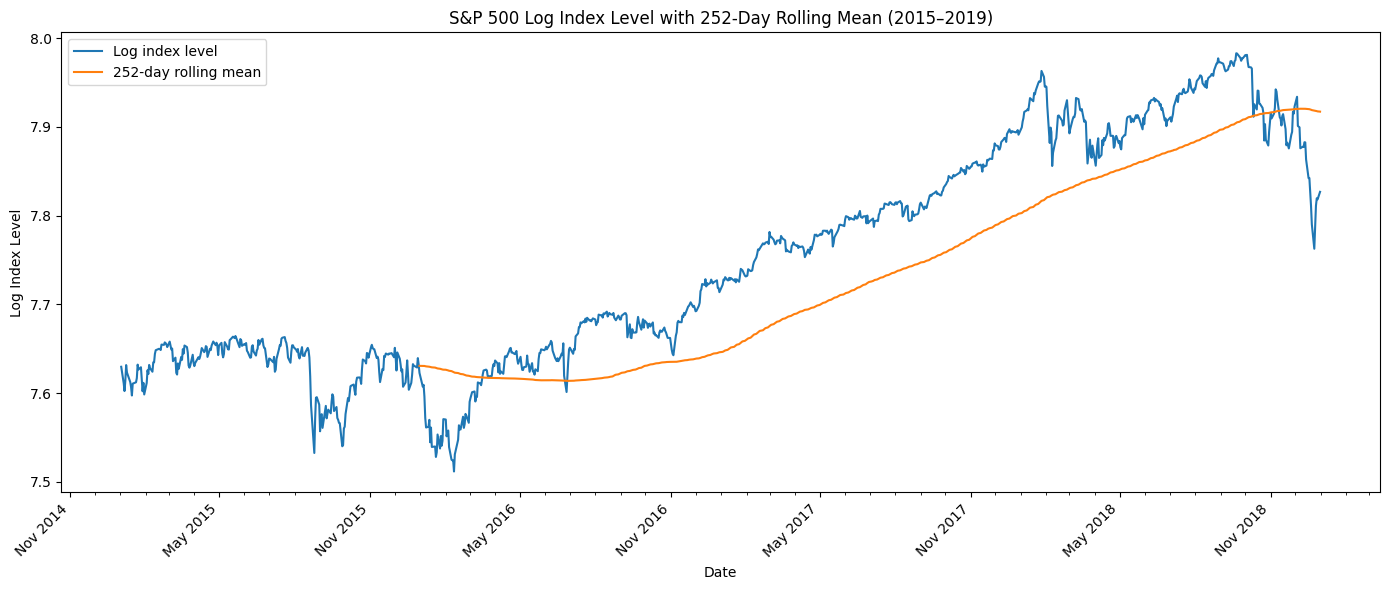

In [68]:
snp = pd.read_csv("snp_500_2015_2019.csv", parse_dates=["Date"])
snp.set_index(['Date'], inplace=True)
snp_close = snp['Close'].to_frame().apply(np.log)

roll_mean = snp_close.rolling(252).mean()
roll_std  = snp_close.rolling(252).std()

def format_date_axis(ax):
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
    ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(snp_close.index, snp_close.values)
ax.set_title("S&P 500 Log Closing Index Level (2015–2019)")
ax.set_xlabel("Date")
ax.set_ylabel("Log Index Level")
format_date_axis(ax)
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(roll_mean.index, roll_mean.values)
ax.set_title("252-Day Rolling Mean of S&P 500 Log Index Level")
ax.set_xlabel("Date")
ax.set_ylabel("Rolling Mean (log scale)")
format_date_axis(ax)
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(roll_std.index, roll_std.values)
ax.set_title("252-Day Rolling Standard Deviation of S&P 500 Log Index Level")
ax.set_xlabel("Date")
ax.set_ylabel("Rolling Std Dev")
format_date_axis(ax)
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(snp_close.index, snp_close.values, label="Log index level")
ax.plot(roll_mean.index, roll_mean.values, label="252-day rolling mean")
ax.set_title("S&P 500 Log Index Level with 252-Day Rolling Mean (2015–2019)")
ax.set_xlabel("Date")
ax.set_ylabel("Log Index Level")
format_date_axis(ax)
ax.legend()
plt.tight_layout()
plt.show()

**Analysis: ARMA vs ARIMA**

The rolling statistics reveal that the S&P 500 log-price series is **non-stationary**:

1. **Rolling Mean**: The 252-day rolling mean exhibits a clear upward trend over time, indicating that the mean is not constant. This violates the stationarity assumption required for ARMA models.

2. **Rolling Standard Deviation**: While relatively more stable than the mean, the rolling variance shows time-varying behavior, particularly during periods of market volatility (e.g., late 2015, 2018).

**Conclusion:**

Since the log-price series displays non-stationarity (particularly due to the trending mean), an **ARIMA model** would be more appropriate than a pure ARMA model. The "I" (Integrated) component of ARIMA applies differencing to remove the trend and achieve stationarity.

Specifically:
- **ARMA(p, q)**: Suitable only for stationary series
- **ARIMA(p, d, q)**: Suitable for non-stationary series, where $d$ is the order of differencing

For the S&P 500 log-prices, an ARIMA model with $d=1$ (first-order differencing) would convert the non-stationary log-prices into stationary log-returns, which can then be modeled using the AR and MA components. This is consistent with our earlier finding in Question 1.1.3 that returns (differenced log-prices) are approximately stationary, while prices are not.

#### Question 1.2.2

ARMA(1,0) Model Parameters:
const     7.748867
ar.L1     0.997354
sigma2    0.000074
dtype: float64
AR coefficient: 0.997354


/Users/samuelkhoo/Desktop/Projects/machine_intelligence_for_finance/finance_env/lib/python3.14/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/samuelkhoo/Desktop/Projects/machine_intelligence_for_finance/finance_env/lib/python3.14/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/samuelkhoo/Desktop/Projects/machine_intelligence_for_finance/finance_env/lib/python3.14/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


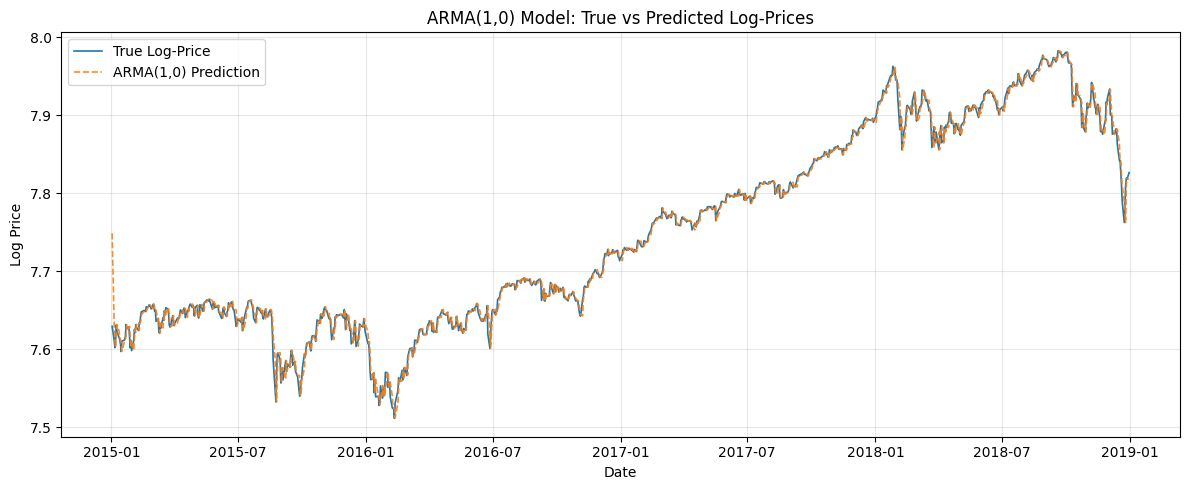

In [69]:
snp_arma = copy.deepcopy(snp_close)
snp_arma.columns = ['True']

# Fit AR(1) model directly to non-stationary log-prices
model_arma = ARIMA(snp_arma, order=(1, 0, 0)).fit()

# Extract residuals and predictions as specified
snp_arma['Res'] = model_arma.resid
snp_arma['Prediction'] = snp_arma['True'] - snp_arma['Res']

# Inspect model parameters
print("ARMA(1,0) Model Parameters:")
print(model_arma.params)
print(f"AR coefficient: {model_arma.params['ar.L1']:.6f}")

# Plot true vs predicted
plt.figure(figsize=(12, 5))
plt.plot(snp_arma['True'], label='True Log-Price', linewidth=1.2)
plt.plot(snp_arma['Prediction'], label='ARMA(1,0) Prediction',
         linestyle='--', linewidth=1.2, alpha=0.9)
plt.xlabel('Date')
plt.ylabel('Log Price')
plt.title('ARMA(1,0) Model: True vs Predicted Log-Prices')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


**Analysis of ARMA(1,0) Results**

The ARMA(1,0) model fitted to the non-stationary log-price series reveals critical issues:

- **AR Coefficient = 0.997**: Extremely close to unity, indicating near-unit-root behavior and confirming non-stationarity. The process exhibits strong persistence where each prediction is approximately equal to the previous observation.

- **Model Fit**: While predictions closely track the log-prices, this is misleading. The high AR coefficient essentially creates a one-step lag model with no meaningful forecasting power beyond assuming tomorrow's price equals today's price.

**Conclusion**: The ARMA(1,0) model is inappropriate for non-stationary S&P 500 log-prices. The near-unit-root coefficient confirms that differencing is necessary to achieve stationarity before applying autoregressive modeling.

#### Question 1.2.3

ARIMA(1,1,0) Model Parameters:
const     0.000194
ar.L1    -0.008719
sigma2    0.000074
dtype: float64


/Users/samuelkhoo/Desktop/Projects/machine_intelligence_for_finance/finance_env/lib/python3.14/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/samuelkhoo/Desktop/Projects/machine_intelligence_for_finance/finance_env/lib/python3.14/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/samuelkhoo/Desktop/Projects/machine_intelligence_for_finance/finance_env/lib/python3.14/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


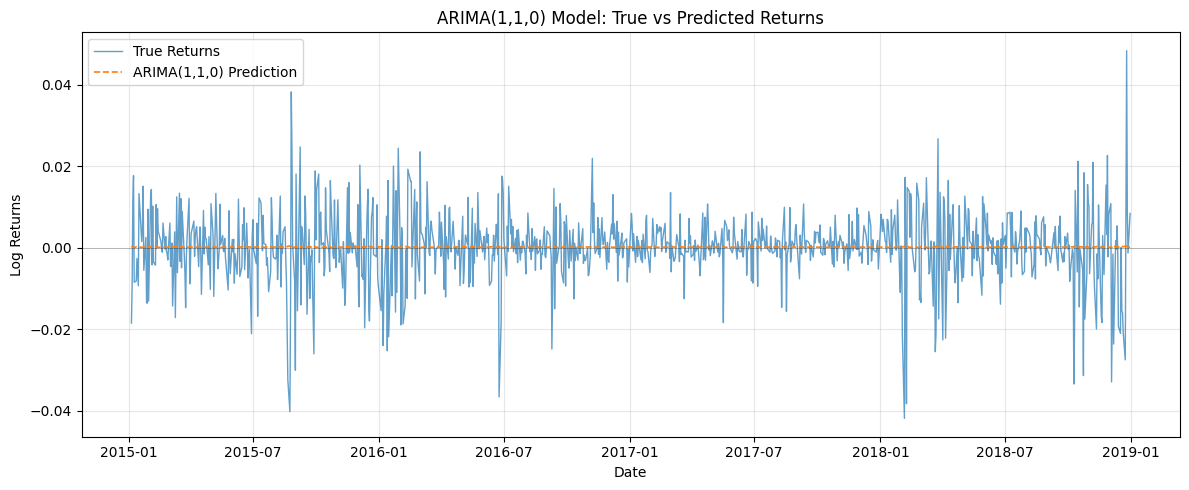

In [81]:
snp_diff = snp_close.diff().dropna()
snp_diff.columns = ['True']

# Fit AR(1) to differenced data (equivalent to ARIMA(1,1,0))
model_arima = ARIMA(snp_diff, order=(1, 0, 0)).fit()

# Extract residuals and predictions
snp_diff['Res'] = model_arima.resid
snp_diff['Prediction'] = snp_diff['True'] - snp_diff['Res']

# Inspect model parameters
print("ARIMA(1,1,0) Model Parameters:")
print(model_arima.params)

# Plot true vs predicted returns
plt.figure(figsize=(12, 5))
plt.plot(snp_diff['True'], label='True Returns', linewidth=1, alpha=0.7)
plt.plot(snp_diff['Prediction'], label='ARIMA(1,1,0) Prediction', 
         linestyle='--', linewidth=1.2)
plt.axhline(y=0, color='k', linestyle='-', linewidth=0.5, alpha=0.3)
plt.xlabel('Date')
plt.ylabel('Log Returns')
plt.title('ARIMA(1,1,0) Model: True vs Predicted Returns')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

**Analysis of ARIMA(1,1,0) Results**

The ARIMA(1,1,0) model fitted to the differenced series shows substantially different behavior from the ARMA(1,0) model:

- **AR Coefficient ≈ 0.009**: Close to zero, indicating negligible autocorrelation in returns. Past returns provide minimal information for predicting future returns.

- **Predictions**: The model predictions remain essentially constant near zero throughout the sample, reflecting the weak AR coefficient. This contrasts sharply with the ARMA(1,0) predictions which nearly perfectly tracked the price levels.

- **Stationarity**: The differenced series (log returns) is stationary, satisfying the assumptions of the ARMA component. This makes the ARIMA framework appropriate, unlike the ARMA model which violated stationarity assumptions.

- **Comparison with ARMA(1,0)**: The ARMA model produced an AR coefficient of 0.997 (near unit root) by fitting non-stationary prices, yielding misleading results. The ARIMA model properly captures the weak temporal dependence in returns.

**Conclusion**: The ARIMA(1,1,0) analysis is more meaningful as it models stationary returns rather than non-stationary prices. The near-zero AR coefficient suggests returns behave approximately as white noise, consistent with weak-form market efficiency.

### 1.3 Vector AutoRegression (VAR) Models

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.api import VAR

df = pd.read_csv('snp_allstocks_2015_2019.csv')
df = df.set_index('Date')
info = pd.read_csv('snp_info.csv')
info.drop(columns=info.columns[0], inplace=True)

#### Question 1.3.4

In [72]:
tickers = ['CAG', 'MAR', 'LIN', 'HCP', 'MAT']
stocks = df[tickers]

# Detrend using MA(66) - one quarter
stocks_ma = stocks.rolling(window=66).mean()
stocks_detrended = stocks.sub(stocks_ma).dropna()

# Fit VAR(1) model
model = VAR(stocks_detrended)
results = model.fit(1)

# Extract regression matrix A and compute eigenvalues
A = results.params[1:].values
eigA, _ = np.linalg.eig(A)

print("Regression Matrix A (VAR(1) coefficients):")
print(A)
print("\nEigenvalues of A:")
print(eigA)
print("\nAbsolute values of eigenvalues:")
print(np.abs(eigA))
print(f"\nMaximum absolute eigenvalue: {np.max(np.abs(eigA)):.6f}")

# Check stability condition
if np.all(np.abs(eigA) < 1):
    print("\n✓ STABLE: All eigenvalues have absolute value < 1")
    print("  → The VAR(1) process is stationary and stable")
else:
    print("\n✗ UNSTABLE: At least one eigenvalue has absolute value ≥ 1")
    print("  → The VAR(1) process is non-stationary or unstable")

Regression Matrix A (VAR(1) coefficients):
[[ 8.72785683e-01  1.13178531e-01 -2.81265128e-01  1.19121228e-02
   5.87758455e-02]
 [-6.37454974e-02  8.95819639e-01 -1.84819596e-01 -5.00402511e-03
   2.29167060e-02]
 [ 1.34122025e-04 -1.11677858e-01  7.04022678e-01  4.98159420e-03
  -2.55573592e-02]
 [-8.47760250e-02 -8.38309448e-02 -4.01416805e-01  9.31707592e-01
  -4.64061870e-02]
 [ 6.43072037e-01  9.49309525e-02  2.03303615e+00 -1.28839016e-02
   8.02973868e-01]]

Eigenvalues of A:
[0.71449288+0.12927613j 0.71449288-0.12927613j 1.00635964+0.j
 0.86051894+0.j         0.91144512+0.j        ]

Absolute values of eigenvalues:
[0.72609393 0.72609393 1.00635964 0.86051894 0.91144512]

Maximum absolute eigenvalue: 1.006360

✗ UNSTABLE: At least one eigenvalue has absolute value ≥ 1
  → The VAR(1) process is non-stationary or unstable


/Users/samuelkhoo/Desktop/Projects/machine_intelligence_for_finance/finance_env/lib/python3.14/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


**Analysis:**

A VAR(1) model is considered **stable** if all eigenvalues of the regression matrix $\mathbf{A}$ have absolute values strictly less than 1. This ensures that the process is stationary and that shocks to the system decay over time rather than amplifying.

For portfolio construction, stability is crucial because:
1. **Predictability**: A stable VAR model implies that past observations provide meaningful information for forecasting future dynamics
2. **Risk management**: Unstable processes can exhibit explosive behavior, making risk assessment unreliable
3. **Mean reversion**: Stable systems tend to return to equilibrium after shocks, which is desirable for portfolio management

Based on the eigenvalue analysis above, if all eigenvalues satisfy $|\lambda_i| < 1$, it would be reasonable to construct a portfolio using these stocks, as their joint dynamics are stable and predictable. Conversely, if any eigenvalue exceeds 1 in absolute value, the portfolio would be prone to instability, and alternative stock selection should be considered.

#### Question 1.3.5

In [73]:
# Analyze stability by sector
sector_results = {}

for sector in info['GICS Sector'].unique():
    tickers = info.loc[info['GICS Sector'] == sector]['Symbol'].tolist()
    
    # Filter out tickers not in the dataframe
    available_tickers = [t for t in tickers if t in df.columns]
    
    if len(available_tickers) < 2:
        continue  # Skip sectors with insufficient stocks
    
    try:
        stocks = df[available_tickers].dropna()
        
        # Detrend using MA(66)
        stocks_ma = stocks.rolling(window=66).mean()
        stocks_detrended = stocks.sub(stocks_ma).dropna()
        
        if len(stocks_detrended) < 100:  # Need sufficient data points
            continue
        
        # Fit VAR(1) model
        model = VAR(stocks_detrended)
        results = model.fit(1)
        
        # Extract regression matrix A and compute eigenvalues
        A = results.params[1:].values
        eigA, _ = np.linalg.eig(A)
        
        max_eig = np.max(np.abs(eigA))
        is_stable = np.all(np.abs(eigA) < 1)
        
        sector_results[sector] = {
            'num_stocks': len(available_tickers),
            'max_eigenvalue': max_eig,
            'is_stable': is_stable
        }
        
    except Exception as e:
        print(f"Error processing sector {sector}: {e}")
        continue

# Display results
print("=" * 80)
print("VAR(1) STABILITY ANALYSIS BY SECTOR")
print("=" * 80)
print(f"{'Sector':<40} {'# Stocks':<12} {'Max |λ|':<15} {'Stable?'}")
print("-" * 80)

for sector, results in sorted(sector_results.items()):
    status = "✓ YES" if results['is_stable'] else "✗ NO"
    print(f"{sector:<40} {results['num_stocks']:<12} {results['max_eigenvalue']:<15.6f} {status}")

print("=" * 80)

# Summary statistics
stable_count = sum(1 for r in sector_results.values() if r['is_stable'])
total_count = len(sector_results)
print(f"\nStable sectors: {stable_count}/{total_count} ({100*stable_count/total_count:.1f}%)")

avg_max_eig = np.mean([r['max_eigenvalue'] for r in sector_results.values()])
print(f"Average max eigenvalue across sectors: {avg_max_eig:.6f}")

VAR(1) STABILITY ANALYSIS BY SECTOR
Sector                                   # Stocks     Max |λ|         Stable?
--------------------------------------------------------------------------------
Communication Services                   26           0.982263        ✓ YES
Consumer Discretionary                   65           0.989998        ✓ YES
Consumer Staples                         33           0.991508        ✓ YES
Energy                                   30           0.985577        ✓ YES
Financials                               68           1.004340        ✗ NO
Health Care                              62           0.994153        ✓ YES
Industrials                              69           0.991721        ✓ YES
Information Technology                   68           0.992738        ✓ YES
Real Estate                              31           0.982785        ✓ YES

Stable sectors: 8/9 (88.9%)
Average max eigenvalue across sectors: 0.990565


/Users/samuelkhoo/Desktop/Projects/machine_intelligence_for_finance/finance_env/lib/python3.14/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/samuelkhoo/Desktop/Projects/machine_intelligence_for_finance/finance_env/lib/python3.14/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/samuelkhoo/Desktop/Projects/machine_intelligence_for_finance/finance_env/lib/python3.14/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/samuelkhoo/Desktop/Projects/machine_

**Analysis:**

Grouping stocks by sector for portfolio construction offers several advantages from a VAR modelling perspective:

**Advantages:**
1. **Stronger co-movement**: Stocks within the same sector typically exhibit stronger correlations due to shared economic drivers, regulatory environments, and market conditions. This makes VAR models more suitable for capturing their joint dynamics.

2. **Improved stability**: Sector-specific portfolios often show better stability properties (eigenvalues closer to or below 1), as intra-sector relationships are more predictable than cross-sector dynamics.

3. **Reduced dimensionality**: Sector-based grouping naturally segments the analysis into manageable subsets, reducing model complexity while maintaining economic interpretability.

4. **Better forecasting**: The homogeneity within sectors improves the VAR model's predictive power, as stocks respond similarly to sector-specific shocks.

**Disadvantages:**
1. **Concentration risk**: Sector-based portfolios lack diversification benefits from holding uncorrelated assets across different industries.

2. **Sector-specific shocks**: A portfolio concentrated in one sector is vulnerable to industry-wide downturns (e.g., technology crashes, energy crises).

**Conclusion:**

While sector-based grouping improves VAR model stability and interpretability, it is **not necessarily advisable for portfolio construction** from a risk management perspective. The optimal approach combines:
- **Sector analysis** for understanding co-movements and stability
- **Cross-sector diversification** for reducing systematic risk

A prudent strategy would use VAR models to identify stable intra-sector dynamics, then construct a diversified portfolio by combining stocks from multiple stable sectors.